<a href="https://colab.research.google.com/github/NavyaS26/Internship/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])
def sig(x):
    return 1 / (1 + np.exp(-x))
def dsig(x):
    return sig(x) * (1 - sig(x))
np.random.seed(0)

ip_size = 2
hid_size = 4
op_size = 1
epochs = 10001
learning_rate = 0.1

W1 = np.random.rand(ip_size, hid_size)
b1 = np.zeros((1, hid_size))
W2 = np.random.rand(hid_size, op_size)
b2 = np.zeros((1, op_size))

for epoch in range(epochs):
    z1 = X.dot(W1) + b1
    a1 = sig(z1)
    z2 = a1.dot(W2) + b2
    a2 = sig(z2)

    error = Y - a2
    d_a2 = error * dsig(z2)
    error_hidden = d_a2.dot(W2.T) * dsig(z1)

    W2 += a1.T.dot(d_a2) * learning_rate
    b2 += np.sum(d_a2, axis=0, keepdims=True) * learning_rate
    W1 += X.T.dot(error_hidden) * learning_rate
    b1 += np.sum(error_hidden, axis=0, keepdims=True) * learning_rate

    if not epoch % 1000:
        loss = np.mean(np.square(error))
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

Epoch 0, Loss: 0.3632
Epoch 1000, Loss: 0.2486
Epoch 2000, Loss: 0.2429
Epoch 3000, Loss: 0.2117
Epoch 4000, Loss: 0.1350
Epoch 5000, Loss: 0.0367
Epoch 6000, Loss: 0.0142
Epoch 7000, Loss: 0.0081
Epoch 8000, Loss: 0.0055
Epoch 9000, Loss: 0.0041
Epoch 10000, Loss: 0.0032


In [46]:
def predict(x):
    a1 = sig(x.dot(W1) + b1)
    a2 = sig(a1.dot(W2) + b2)
    return (a2 > 0.5).astype(int)
test_cases = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = predict(test_cases)

print("\nTest Case Results:")
for i, test in enumerate(test_cases):
    print(f"Input: {test} → Predicted: {predictions[i][0]} | Expected: {Y[i][0]}")


Test Case Results:
Input: [0 0] → Predicted: 0 | Expected: 0
Input: [0 1] → Predicted: 1 | Expected: 1
Input: [1 0] → Predicted: 1 | Expected: 1
Input: [1 1] → Predicted: 0 | Expected: 0


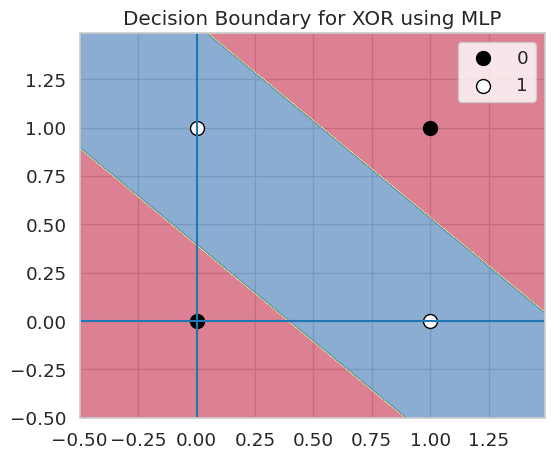

In [47]:
h = 0.01
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.6)

for i in range(len(X)):
    if Y[i] == 0:
        plt.scatter(X[i, 0], X[i, 1], c='black', edgecolors='k',s=100, label='0' if i == 0 else "")
    else:
        plt.scatter(X[i, 0], X[i, 1], c='white', edgecolors='k', s=100, label='1' if i == 1 else "")
plt.axhline()
plt.axvline()
plt.title("Decision Boundary for XOR using MLP")
plt.legend()
plt.show()
